# Object Detection with Deep Learning

## Single Shot MultiBox Detector (SSD)

In [7]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [3]:
# COCO classes
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'N/A', 'toilet',
    'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [5]:
# Load the pre-trained SSD model
model = models.detection.ssd300_vgg16(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 175MB/s]


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [9]:
# Load the image
image_path = '/content/pedestrian.jpeg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_tensor = transforms.functional.to_tensor(image).unsqueeze(0)


In [10]:
image_tensor.shape

torch.Size([1, 3, 667, 1000])

In [11]:
# Perform object detection
with torch.no_grad():
    detections = model(image_tensor)[0]

In [12]:
print(detections)

{'boxes': tensor([[5.9842e+02, 1.3360e+02, 7.9646e+02, 5.2584e+02],
        [3.2990e+02, 1.7466e+02, 5.8698e+02, 3.3248e+02],
        [1.3241e+01, 1.7673e+02, 2.3987e+02, 3.4114e+02],
        [1.9629e+02, 1.7558e+02, 3.3570e+02, 2.9630e+02],
        [8.2976e+02, 1.5453e+02, 9.1887e+02, 1.9562e+02],
        [7.1878e+02, 2.6664e+02, 8.0122e+02, 3.9222e+02],
        [7.7924e+02, 2.1919e+02, 9.6580e+02, 3.1836e+02],
        [6.6952e+02, 2.1217e+02, 7.8125e+02, 3.8760e+02],
        [7.4461e+02, 1.4770e+02, 7.6631e+02, 1.9509e+02],
        [9.1428e+02, 1.5635e+02, 9.9504e+02, 1.8964e+02],
        [3.3621e+00, 1.7390e+02, 1.6409e+02, 2.9034e+02],
        [0.0000e+00, 1.7011e+02, 7.5914e+01, 2.4004e+02],
        [2.1193e+02, 1.6111e+02, 2.5979e+02, 1.7837e+02],
        [8.7448e+02, 1.5526e+02, 9.5293e+02, 1.8999e+02],
        [3.1918e+02, 1.7586e+02, 3.5687e+02, 2.0055e+02],
        [3.6647e+02, 1.8842e+02, 4.0134e+02, 2.2800e+02],
        [2.3289e+02, 1.6271e+02, 2.8345e+02, 1.7978e+02],
    

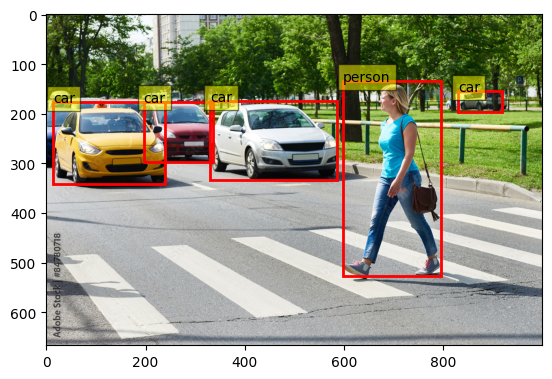

In [13]:
# Display the image and detections
fig, ax = plt.subplots(1)
ax.imshow(image)
for i in range(len(detections["boxes"])):
    box = detections["boxes"][i]
    score = detections["scores"][i]
    label = detections["labels"][i]

    if score > 0.5:  # Draw boxes only for high-confidence detections
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1, COCO_INSTANCE_CATEGORY_NAMES[label], bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()

## Faster R-CNN

In [14]:
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt

In [15]:
# Load the pre-trained Fast R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 154MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [16]:
# Define the classes
classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
    'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie',
    'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A',
    'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [17]:
# Load an image
image_path = '/content/pedestrian.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
# Convert image to tensor
image_tensor = torchvision.transforms.functional.to_tensor(image)

In [19]:
# Perform inference
output = model([image_tensor])

In [20]:
output

[{'boxes': tensor([[6.0628e+02, 1.3986e+02, 7.8993e+02, 5.3959e+02],
          [1.2850e+01, 1.8756e+02, 2.4211e+02, 3.4456e+02],
          [3.2544e+02, 1.8087e+02, 5.9720e+02, 3.3581e+02],
          [1.8868e+02, 1.7732e+02, 3.3439e+02, 2.9600e+02],
          [0.0000e+00, 1.8758e+02, 5.4613e+01, 2.9076e+02],
          [7.2408e+02, 2.6915e+02, 7.9414e+02, 4.0474e+02],
          [8.0618e+02, 1.5896e+02, 8.4723e+02, 1.9304e+02],
          [8.3480e+02, 1.5417e+02, 9.3274e+02, 1.9588e+02],
          [2.1542e+00, 1.8244e+02, 1.6102e+02, 2.8834e+02],
          [7.3190e+02, 3.3307e+02, 7.9040e+02, 4.0463e+02],
          [4.7819e+01, 1.6787e+02, 1.9869e+02, 2.0462e+02],
          [1.7503e+00, 1.7468e+02, 4.0438e+01, 1.8944e+02],
          [7.6499e+02, 1.7260e+02, 7.9934e+02, 1.9305e+02],
          [7.4976e+02, 1.4694e+02, 7.6651e+02, 1.9688e+02],
          [1.9795e+02, 1.5562e+02, 2.7858e+02, 1.8043e+02],
          [7.6300e+02, 1.4890e+02, 7.7363e+02, 1.9556e+02],
          [6.9575e+02, 2.0917e+

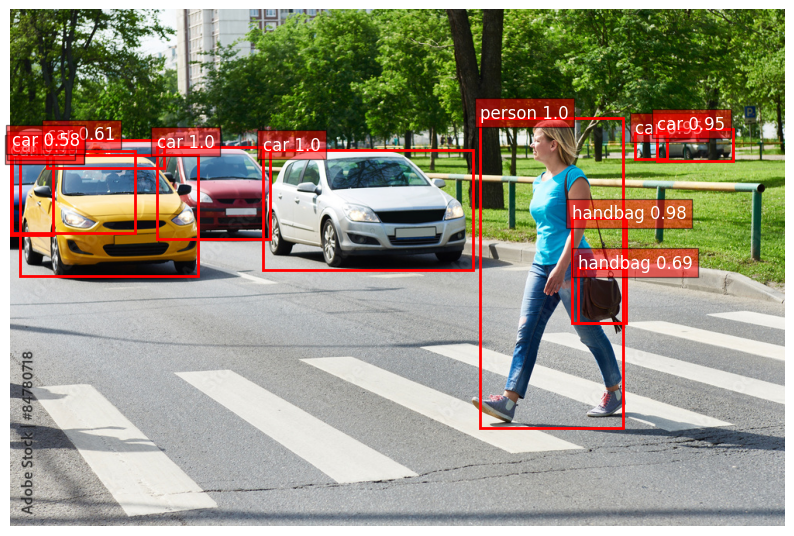

In [21]:
# Visualize the detections
plt.figure(figsize=(10, 8))
plt.imshow(image)
ax = plt.gca()
for box, label, score in zip(output[0]['boxes'], output[0]['labels'], output[0]['scores']):
    if score > 0.5:  # Filter out detections with low confidence
      ax.add_patch(plt.Rectangle((box[0].detach().numpy(), box[1].detach().numpy()), box[2].detach().numpy() - box[0].detach().numpy(), box[3].detach().numpy() - box[1].detach().numpy(), fill=False, edgecolor='red', linewidth=2))
      ax.text(box[0], box[1], classes[label.item()] + ' ' + str(round(score.item(), 2)), bbox=dict(facecolor='red', alpha=0.5), fontsize=12, color='white')
plt.axis('off')
plt.show()